In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
bc = pd.read_csv('Data/file1.csv')
bc

Date          Open          High           Low         Close  \
0     2014-09-17    465.864014    468.174011    452.421997    457.334015   
1     2014-09-18    456.859985    456.859985    413.104004    424.440002   
2     2014-09-19    424.102997    427.834991    384.532013    394.795990   
3     2014-09-20    394.673004    423.295990    389.882996    408.903992   
4     2014-09-21    408.084991    412.425995    393.181000    398.821014   
...          ...           ...           ...           ...           ...   
2580  2021-10-14  57372.832031  58478.734375  56957.074219  57321.523438   
2581  2021-10-15  57345.902344  62757.128906  56868.144531  61593.949219   
2582  2021-10-16  61609.527344  62274.476563  60206.121094  60892.179688   
2583  2021-10-17  60887.652344  61645.523438  59164.468750  61553.617188   
2584  2021-10-18  61548.804688  62614.660156  60012.757813  62026.078125   

         Adj Close        Volume    Return Day of Week  
0       457.334015  2.105680e+07       NaN         Wed  
1       424.440002  3.448320e+07 -0.071926         Thu  
2       394.795990  3.791970e+07 -0.069843         Fri  
3       408.903992  3.686360e+07  0.035735         Sat  
4       398.821014  2.658010e+07 -0.024659         Sun  
...            ...           ...       ...         ...  
2580  57321.523438  3.661579e+10 -0.001386         Thu  
2581  61593.949219  5.178008e+10  0.074534         Fri  
2582  60892.179688  3.425096e+10 -0.011393         Sat  
2583  61553.617188  2.903237e+10  0.010862         Sun  
2584  62026.078125  3.805556e+10  0.007676         Mon  

[2585 rows x 9 columns]

# Pre-processing & Training Data Development

In [3]:
import fbprophet
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [4]:
from pandas import to_datetime
from fbprophet import Prophet
import datetime
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import add_changepoints_to_plot, plot_cross_validation_metric

In [5]:
bc_prophet = bc[['Date','Adj Close']]
#rename columns to work with Prophet
bc_prophet.columns = ['ds', 'y']

In [6]:
bc_prophet=bc_prophet.dropna()
train_X= bc_prophet[:2218]
test_X= bc_prophet[2218:]

In [7]:
prophet= Prophet()
prophet.fit(train_X)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


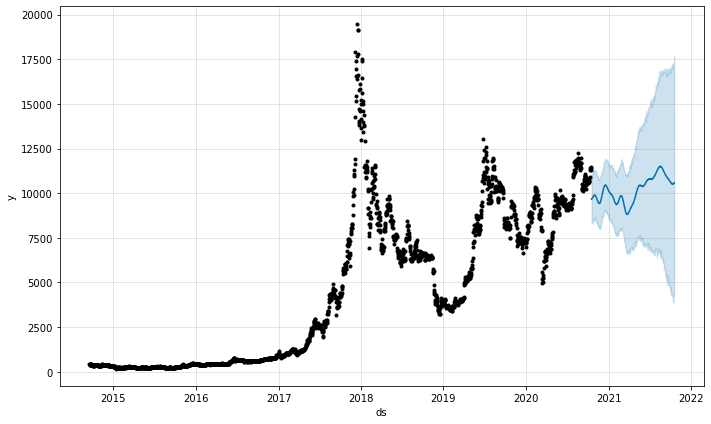

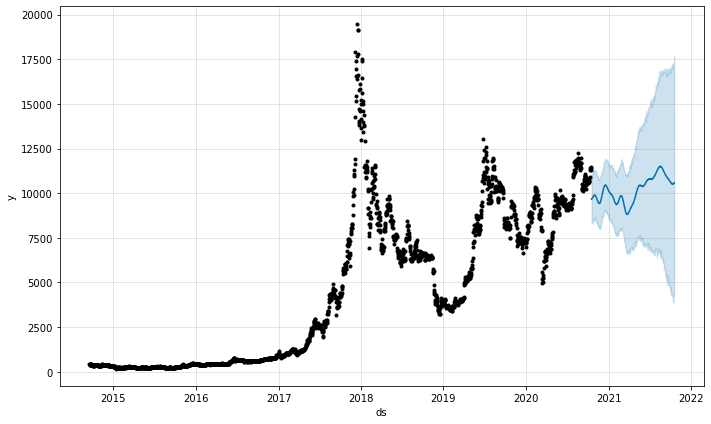

In [8]:
#Plot to get general view of the model
forecast_data = prophet.predict(test_X)
prophet.plot(forecast_data)

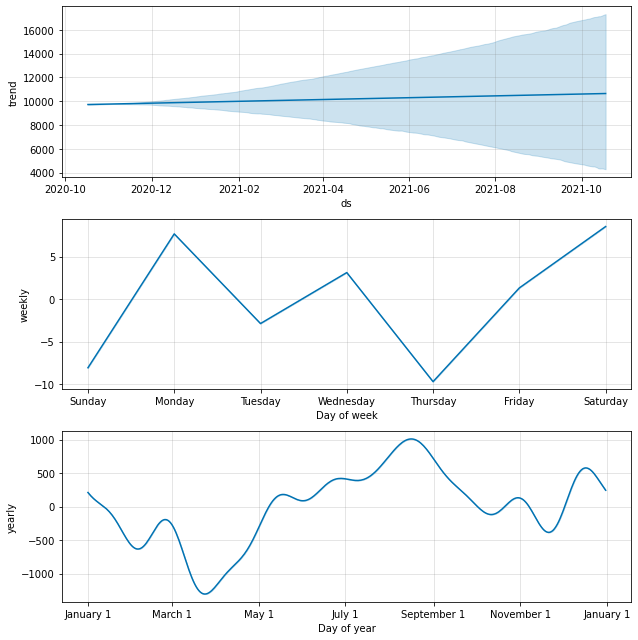

In [9]:
plt2 = prophet.plot_components(forecast_data)